In [2]:
# 1. Data Exploration and Preprocessing

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
data = pd.read_csv("/content/Alphabets_data.csv")
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [2]:
# Display basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [3]:
# Display the first few rows of the dataset
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(data.isnull().sum())

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [5]:
# Assuming 'features' and 'target' are the column names
features = data.drop('letter', axis=1)
target = data['letter']

# Display the features and target
print(features)

       xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0         2     8      3       5      1     8    13      0      6      6   
1         5    12      3       7      2    10     5      5      4     13   
2         4    11      6       8      6    10     6      2      6     10   
3         7    11      6       6      3     5     9      4      6      4   
4         2     1      3       1      1     8     6      6      6      6   
...     ...   ...    ...     ...    ...   ...   ...    ...    ...    ...   
19995     2     2      3       3      2     7     7      7      6      6   
19996     7    10      8       8      4     4     8      6      9     12   
19997     6     9      6       7      5     6    11      3      7     11   
19998     2     3      4       2      1     8     7      2      6     10   
19999     4     9      6       6      2     9     5      3      1      8   

       x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0          10       8      0     

In [6]:
print(target)

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: letter, Length: 20000, dtype: object


In [7]:
# Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)
features_normalized

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [8]:
# 2. Model Implementation

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[-0.01230945, -0.01074302, -0.06048579, ..., -0.21908163,
          0.12008142,  0.12291107],
        [-0.01230945, -0.01074302,  0.43590966, ..., -0.21908163,
          0.12008142, -0.49535386],
        [-0.53500387, -0.6159833 , -0.55688123, ...,  0.42746295,
         -0.65903564, -1.11361878],
        ...,
        [-0.53500387, -0.91860345,  0.43590966, ..., -0.8656262 ,
         -0.26947711,  0.74117599],
        [-0.53500387,  0.29187713, -0.55688123, ..., -0.21908163,
         -1.04859417, -0.49535386],
        [-1.58039272, -1.22122359, -1.54967212, ..., -0.8656262 ,
         -1.4381527 , -0.49535386]]),
 array([[-0.53500387, -0.31336316, -0.06048579, ..., -0.8656262 ,
          1.288757  , -1.11361878],
        [-0.01230945,  1.19973756,  0.43590966, ...,  1.7205521 ,
          1.288757  , -1.73188371],
        [-0.53500387, -0.91860345, -0.06048579, ..., -1.51217078,
         -0.65903564,  0.12291107],
        ...,
        [ 0.51038497,  0.89711742,  0.93230511, ..., -

In [9]:
# Construct the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Convert target variables to numeric type
y_train = y_train.map({'T': 1, 'L': 0, 'E': 2})  # Map 'T', 'L', and 'E' to integers
y_test = y_test.map({'T': 1, 'L': 0, 'E': 2})
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0381 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 2/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0395 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 3/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0357 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 4/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0399 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 5/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0347 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 6/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0379 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 7/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0367 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 8/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0384 - loss: nan - val_accuracy: 0.0388 - val_loss: nan
Epoch 9

In [12]:
!pip install --upgrade scikit-learn

In [13]:
!pip install scikeras

from sklearn.model_selection import GridSearchCV

In [14]:
!pip install --upgrade tensorflow

In [15]:
!pip install tensorflow

In [16]:
!pip install keras

In [17]:
!pip install matplotlib-venn

In [18]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [19]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [20]:
!pip install cartopy
import cartopy

In [21]:
# 3. Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from tensorflow.keras import Sequential # Import Sequential for defining model architecture
from tensorflow.keras.layers import Dense # Import Dense layer for fully connected layers
from scikeras.wrappers import KerasClassifier  # Correct import for KerasClassifier

# Sample data (replace this with your actual data loading)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model(activation='relu', neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)
param_grid = {
    'model__activation': ['relu', 'tanh'],  # Pass 'activation' as an argument to create_model
    'model__neurons': [32, 64, 128],  # Pass 'neurons' as an argument to create_model
    'batch_size': [10, 20],
    'epochs': [50, 100]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: User

In [22]:
# 4. Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
# Use the fitted grid search object to make predictions
y_pred = grid_result.predict(X_test)
y_pred_classes = [1 if prob > 0.5 else 0 for prob in y_pred]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.81
Precision: 0.8631578947368421
Recall: 0.7663551401869159
F1-score: 0.8118811881188119


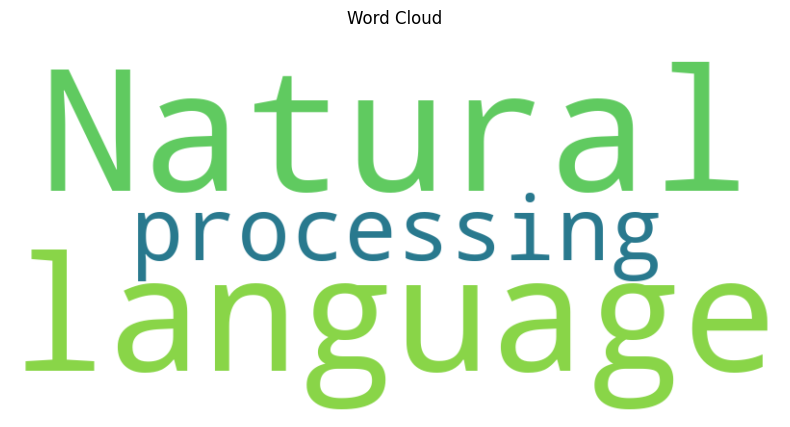

In [10]:
# NLP Visualizations

#Word Cloud

from wordcloud import WordCloud

text = 'Natural language processing'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


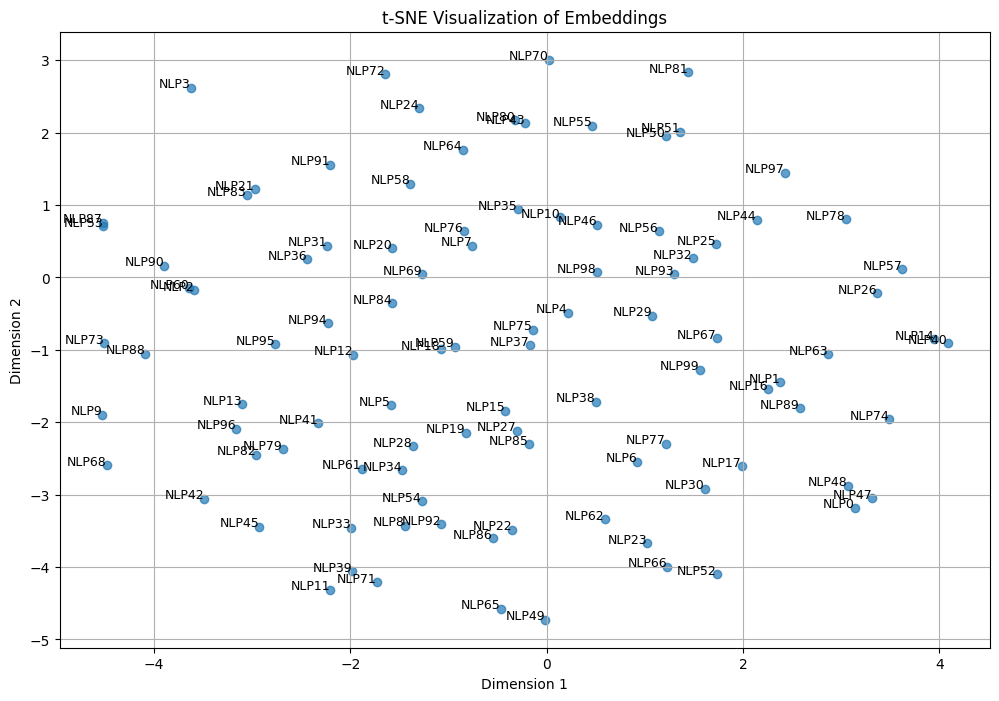

In [13]:
# t-SNE for Embeddings

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Generate example embeddings and words
embeddings = np.random.rand(100, 50)  # Replace with your actual embeddings
words = ['NLP' + str(i) for i in range(100)]  # Replace with your actual words

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7)

# Annotate the points with words
for i, word in enumerate(words):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], word, fontsize=9, ha='right')

plt.title('t-SNE Visualization of Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()
